# Project: Investigate a Dataset (TMDb movie data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


### Dataset Description 

For this project, the dataset selected is the "TMDb movie data" dataset, it contains different information about movies collected from The Movie Database, including user ratings and revenue.<br>

### Question(s) for Analysis

The questions that will be answered relevant to this dataset are the following: 
1. does runtime affect vote?
2. do production companies affect vote?
3. do production companies affect revenue?
4. does budget affectt revenue? 

Starting up with importing the needed packages and including statements needed to investigate the dataset

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

Starting up with loading the data:

In [24]:
df=pd.read_csv('tmdb-movies.csv')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [25]:
df.shape

(10866, 21)

#### Checking for missing values, as well as the data types:

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

- Drop homepage, tagline, keywords, overview, release_date columns as I won't be using them 
- Only 23 null values in genres, so they can be dropped <br>
- 'release_date' should be of type datetime instead of object <br>

#### Checking for duplicates:

In [27]:
df.duplicated().sum() 

1

There is one duplicated entry
- Locate the duplicated row and drop it

#### Checking for outliers:

In [28]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


There are lots of 0 values in budget (and budget_adj), revenue (and revenue_adj), and runtime, which is not logical. <br>
These are outliers that need to be handeled<br>
Let's check how many 0 values we have in each:

For this task, I'll create a function that returns the number of null values for each given column to be used whenever needed:

In [29]:
def null_length(dataframe, column):
    print (len(dataframe[dataframe[column]==0]))

In [30]:
null_length(df, 'budget')

5696


In [31]:
null_length(df, 'revenue')

6016


In [32]:
null_length(df, 'runtime')

31


We have total 6016 movies without revenue data, 5696 movies without budget data and 31 movies without runtime data. <br>
Since the number of movies without budget or revenue data is fairly high, these movies can't be dropped, so we'll just replace the zeros with NaN.<br>
For runtime, only 31 movies are missing this value, so they can be dropped <br>
- Replace 0 in budget, revenue, budget_adj and revenue_adj with NaN.
- Drop rows with zero runtime.

### Data Cleaning

Checking for the characteristics of the whole dataframe: 

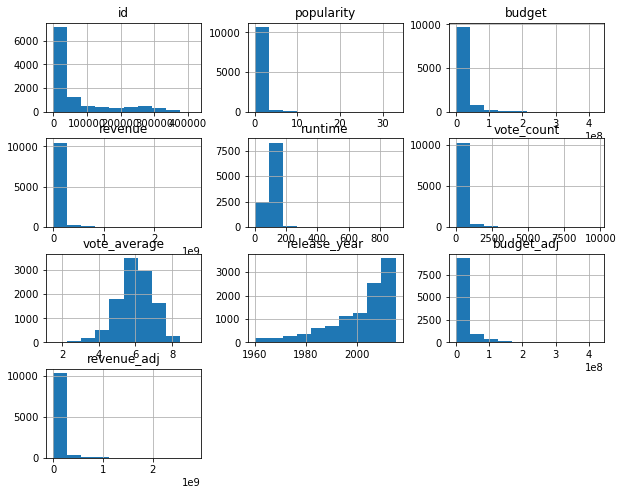

In [33]:
df.hist(figsize=(10,8));

Then, since producion_companies has the highest number of missing values, I chose to check for the characteristics of the rows with missing production company values to see if they have specefic characteristics to them: 

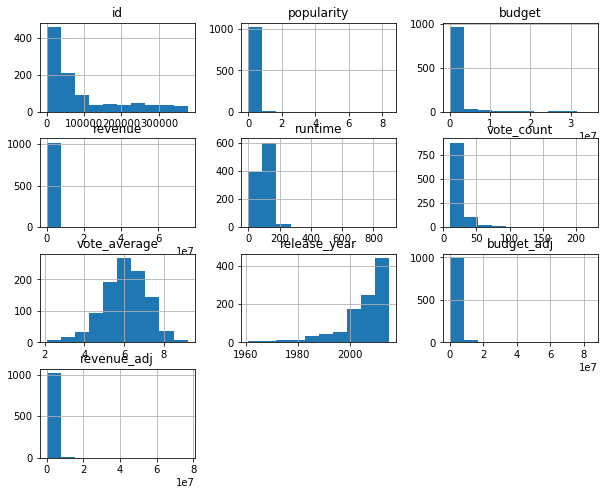

In [34]:
df[df.production_companies.isnull()].hist(figsize=(10,8));

The graphs have the same shape as those of the whole dataframe so things should be fine regarding this aspect 

All the remaining columns with missing values are not numerical so they can't be filled with the mean 

1. Dropping homepage, tagline, keywords, overview columns as I won't be using them:

In [35]:
df.drop(['homepage', 'tagline', 'keywords', 'overview'], axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   director              10822 non-null  object 
 8   runtime               10866 non-null  int64  
 9   genres                10843 non-null  object 
 10  production_companies  9836 non-null   object 
 11  release_date          10866 non-null  object 
 12  vote_count            10866 non-null  int64  
 13  vote_average          10866 non-null  float64
 14  release_year          10866 non-null  int64  
 15  budget_adj         

2. Drop nulls in 'genres':

In [36]:
df = df[df['genres'].notna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10843 non-null  int64  
 1   imdb_id               10835 non-null  object 
 2   popularity            10843 non-null  float64
 3   budget                10843 non-null  int64  
 4   revenue               10843 non-null  int64  
 5   original_title        10843 non-null  object 
 6   cast                  10768 non-null  object 
 7   director              10801 non-null  object 
 8   runtime               10843 non-null  int64  
 9   genres                10843 non-null  object 
 10  production_companies  9827 non-null   object 
 11  release_date          10843 non-null  object 
 12  vote_count            10843 non-null  int64  
 13  vote_average          10843 non-null  float64
 14  release_year          10843 non-null  int64  
 15  budget_adj         

3. 'release_date' should be of type datetime instead of object

In [37]:
df.release_date = pd.to_datetime(df.release_date)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10843 non-null  int64         
 1   imdb_id               10835 non-null  object        
 2   popularity            10843 non-null  float64       
 3   budget                10843 non-null  int64         
 4   revenue               10843 non-null  int64         
 5   original_title        10843 non-null  object        
 6   cast                  10768 non-null  object        
 7   director              10801 non-null  object        
 8   runtime               10843 non-null  int64         
 9   genres                10843 non-null  object        
 10  production_companies  9827 non-null   object        
 11  release_date          10843 non-null  datetime64[ns]
 12  vote_count            10843 non-null  int64         
 13  vote_average    

4. Locate the duplicated row and drop it:

In [38]:
df[df['id'].duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,2010-03-20,110,5.0,2010,30000000.0,967000.0


In [39]:
df=df[~df['id'].duplicated()]

In [40]:
df[df['id'].duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


5. Replace 0 in budget, revenue, budget_adj and revenue_adj with NaN.

In [41]:
df.loc[df["budget"] == 0, "budget"] = np.nan

In [42]:
df[df['budget']==0]

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [43]:
df.loc[df["revenue"] == 0, "revenue"] = np.nan

In [44]:
df[df['revenue']==0]

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [45]:
df.loc[df["budget_adj"] == 0, "budget_adj"] = np.nan

In [46]:
df[df['budget_adj']==0]

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [47]:
df.loc[df["revenue_adj"] == 0, "revenue_adj"] = np.nan

In [48]:
df[df['revenue_adj']==0]

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


6. Drop rows with zero runtime:

In [49]:
df = df[df.runtime != 0]

In [50]:
df[df['runtime']==0]

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


#### Summary of data wrangling step:
* Data investigation: to identify the cleaning actions to be done 
* Data cleaning:
    1. Drop homepage, tagline, keywords, overview, release_date columns as I won't be using them 
    2. Drop nulls in 'genres'<br>
    3. 'release_date' should be of type datetime instead of object <br>
    4. Locate the duplicated row and drop it
    5. Replace 0 in budget, revenue, budget_adj and revenue_adj with NaN.
    6. Drop rows with zero runtime.

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: Does runtime affect vote? 

Here I will be using a scatterplot using vote as the dependent variable and runtime as the independent variable: 

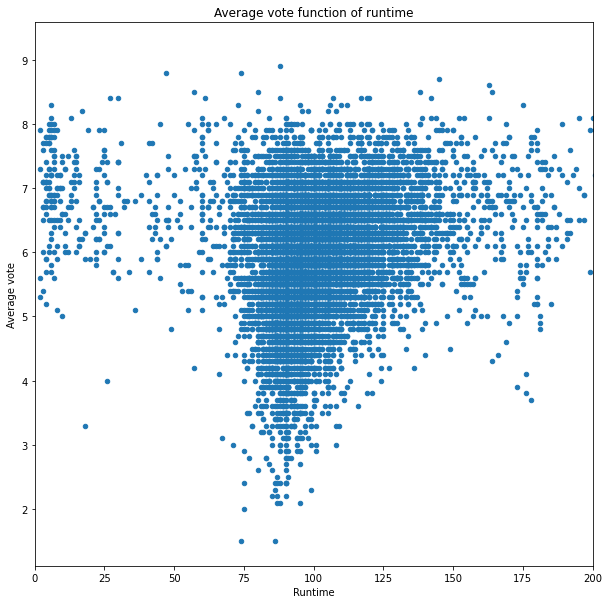

In [51]:
df.plot(kind='scatter',x='runtime',y='vote_average',figsize = (10,10))
plt.xlim([0,200])
plt.title("Average vote function of runtime")
plt.xlabel("Runtime")
plt.ylabel("Average vote")
plt.show()

The scatterplot doesn't show any trend, this proves that the runtime has no effect on the vote 

### Research Question 2: Does budget affect vote?

Here I will be using a scatterplot using vote as the dependent variable and budget as the independent variable: 

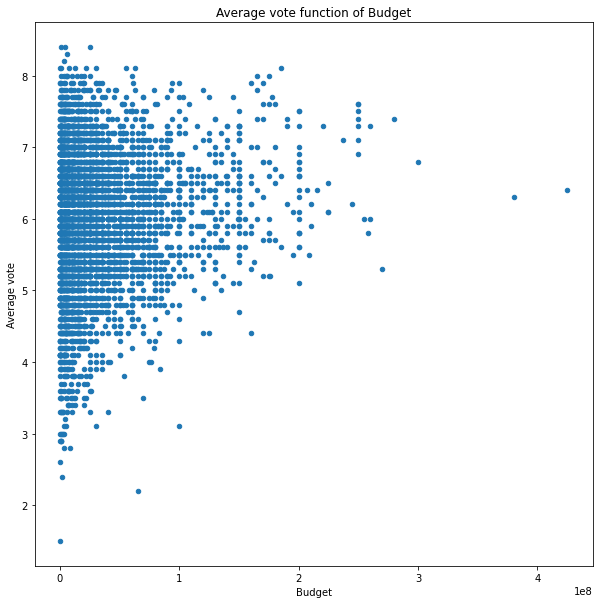

In [55]:
df.plot(kind='scatter',x='budget',y='vote_average',figsize = (10,10))
plt.title("Average vote function of Budget")
plt.xlabel("Budget")
plt.ylabel("Average vote")
plt.show()

There is a small trend that shows that with higher budget there might be higher votes

### Research Question 3: Does budget affect revenue?

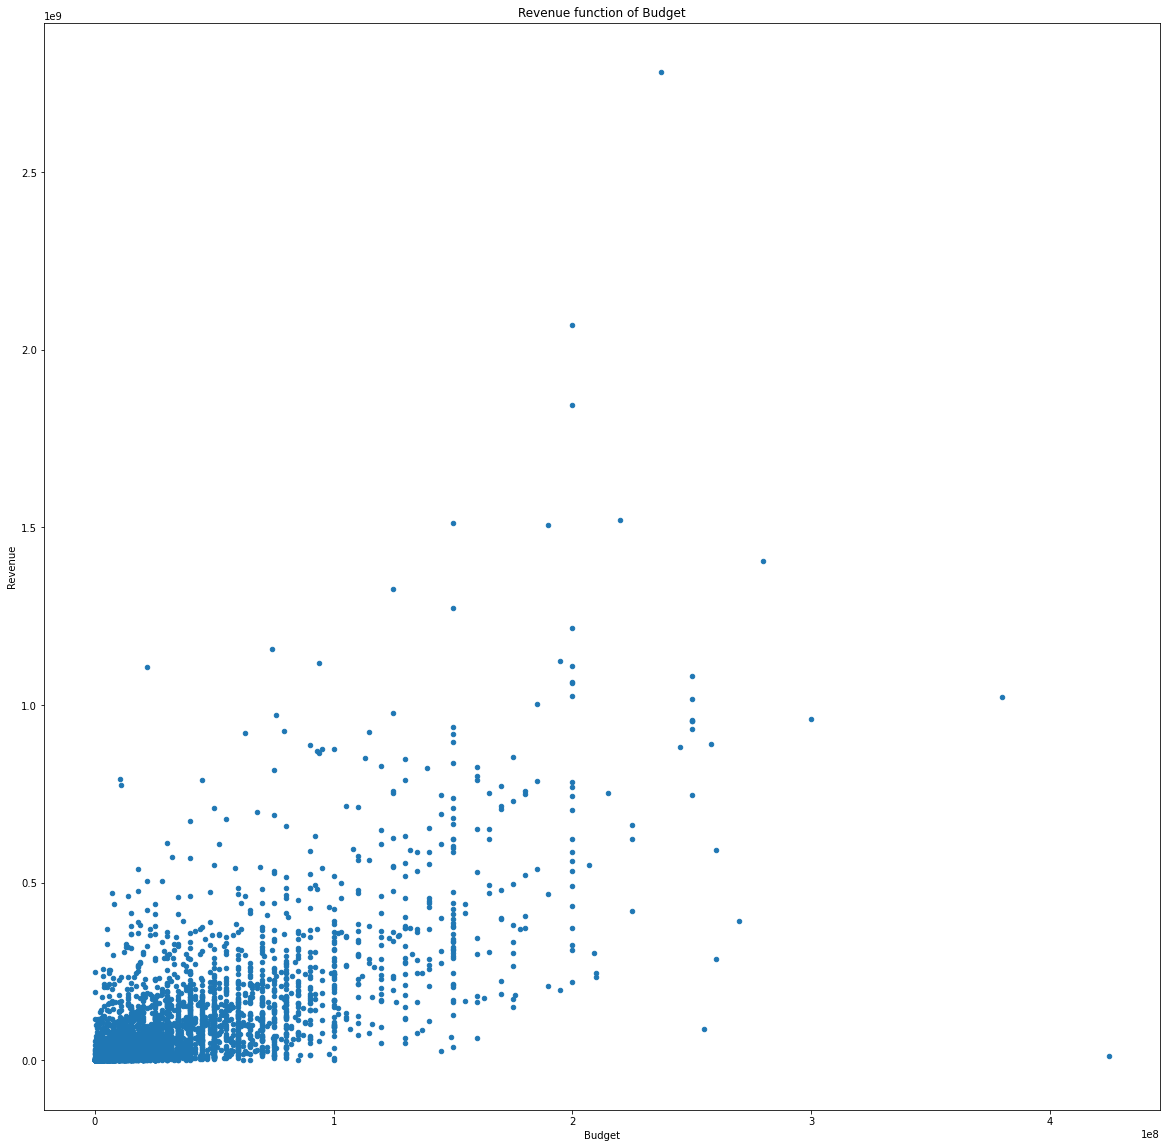

In [56]:
df.plot(kind='scatter',x='budget',y='revenue',figsize = (20,20))
plt.title("Revenue function of Budget")
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.show()

The graph shows a trend: higher budget movies have higher revenues 

### Research Question 4: Do production companies affect vote?

Here I will check for the average vote for each production company

In [54]:
df.groupby('production_companies').vote_average.mean().sort_values(axis=0, ascending=False)

production_companies
SMV Enterprises|Columbia Music Video|EMI                                                           8.7
Edel records GmbH                                                                                  8.5
Miramax Films|British Film Institute (BFI)                                                         8.5
Red Bull Media House|Brain Farm Digital Cinema                                                     8.5
Eficine 226|Beanca Films|Fondo de InversiÃ³n y EstÃ­mulos al Cine (FIDECINE)|MPN Cologne Film 3    8.4
                                                                                                  ... 
Threshold Entertainment|Lions Gate Family Entertainment                                            2.2
Rogue State|Remember Dreaming Productions|Little Dragon Productions                                2.1
Crystal Sky Worldwide|Triumph Films                                                                2.1
Dudez Productions                                   

Clearly, vote differs from one production company to another with some being associated with very high avg votes and others with votes as low as 1.5, this shows that production companies have an effect on votes 

<a id='conclusions'></a>
## Conclusions


Results found may show that: 
- rutime has no effect on vote
- budget has no effect on vote
- budget does have an effect on revenue (positive correlation)
- production companies do have an effect on vote 

### Limitations of this study:

This study is limited by the data quality. As seen in the data wrangling phase, there are a lot of missing values for budget and revenue especially.<br>

Also, despite using the average vote to answer analysis questions, this variable should be used with caution as there is a significant difference between the vote counts for different movies, which can result in an unfair average vote for some movies that have a low vote count.